In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/JoosKorstanje/datasets/main/sales_data.csv')

<AxesSubplot:xlabel='buy'>

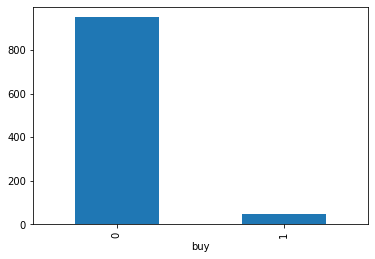

In [41]:
df.pivot_table(index='buy', aggfunc='size').plot(kind='bar')

<AxesSubplot:xlabel='buy'>

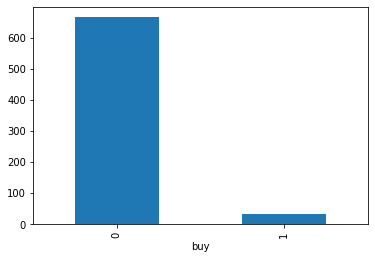

In [54]:
train, test = train_test_split(df, test_size=0.3, stratify=df.buy)
train.pivot_table(index='buy', aggfunc='size').plot(kind='bar')

In [62]:
x_train, x_test = train.iloc[:,:-1], test.iloc[:,:-1]
y_train, y_test = train.iloc[:,-1], test.iloc[:,-1]

In [71]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
pred = log_reg.predict(x_test)

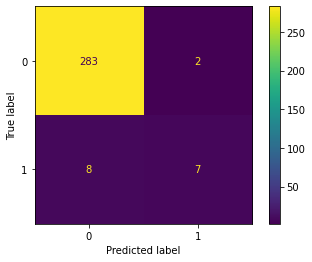

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.78      0.47      0.58        15

    accuracy                           0.97       300
   macro avg       0.88      0.73      0.78       300
weighted avg       0.96      0.97      0.96       300

